In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sn
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('GFM_data.csv', sep = '\t')

### Clean dataframe and standardize numerical data

In [3]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [4]:
df['Amount_Raised'] = pd.Series(preprocessing.scale(df['Amount_Raised'].values))
df['Goal'] = pd.Series(preprocessing.scale(df['Goal'].values))
df['Number_of_Donations'] = pd.Series(preprocessing.scale(df['Number_of_Donations'].values))
df['FB_Shares'] = pd.Series(preprocessing.scale(df['FB_Shares'].values))
df['Number_of_Donors'] = pd.Series(preprocessing.scale(df['Number_of_Donors'].values))
df['Followers'] = pd.Series(preprocessing.scale(df['Followers'].values))

In [5]:
df = df.dropna()

In [6]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))
df['Length_of_Fundraising'] = pd.Series(preprocessing.scale(df['Length_of_Fundraising'].values))

In [7]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",6.616203,8.945946,7.162507,-0.680095,11.813639,7.276107,7.470116,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",5.214384,2.693807,2.035069,1.655223,7.003071,2.031186,2.070553,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",1.659910,2.693807,0.926979,0.112245,1.801064,0.858791,0.882232,"First, thank you for being here. Tommy Rivers ..."
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",1.411933,1.912289,2.307055,1.029692,0.225011,2.319142,2.372845,My name is Melissa Green and I am the mother o...
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",1.194743,1.443379,0.604625,-1.764350,0.338322,0.611972,0.642483,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...


In [8]:
count = 0
for x in df['Location']:
    if x.find('$') != -1:
        count += 1
count

112

## Quantitative Predictors

### The relationship between Amount_Raised and Number_of_Donations appears linear

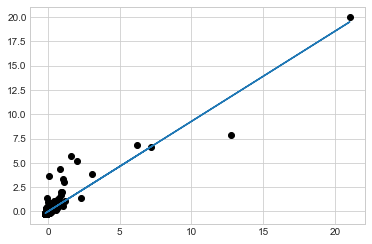

In [9]:
x = df['Number_of_Donations']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so number of donations is a strong predictor of amount raised

In [10]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     4565.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          2.06e-320
Time:                        17:20:07   Log-Likelihood:                -329.13
No. Observations:                 749   AIC:                             662.3
Df Residuals:                     747   BIC:                             671.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.936e-05      0.014      0.007      0.9

In [11]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [12]:
p_values

Number_of_Donations    7.707424e-321
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Goal appears linear

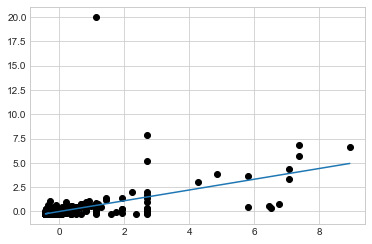

In [13]:
x = df['Goal']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [14]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     327.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           5.72e-61
Time:                        17:20:08   Log-Likelihood:                -927.60
No. Observations:                 749   AIC:                             1859.
Df Residuals:                     747   BIC:                             1868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.031      0.004      0.9

In [15]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [16]:
p_values

Goal    4.762784e-61
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Followers appears linear

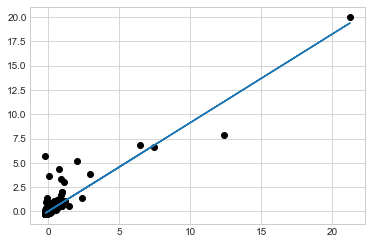

In [17]:
x = df['Followers']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [18]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3902.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          8.76e-299
Time:                        17:20:09   Log-Likelihood:                -379.05
No. Observations:                 749   AIC:                             762.1
Df Residuals:                     747   BIC:                             771.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.015     -0.019      0.9

In [19]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [20]:
p_values

Followers    3.508872e-299
Name: P>|t|, dtype: float64

## Categorical Predictors

In [21]:
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(fontsize=14)

Text(0.5, 0.98, '')

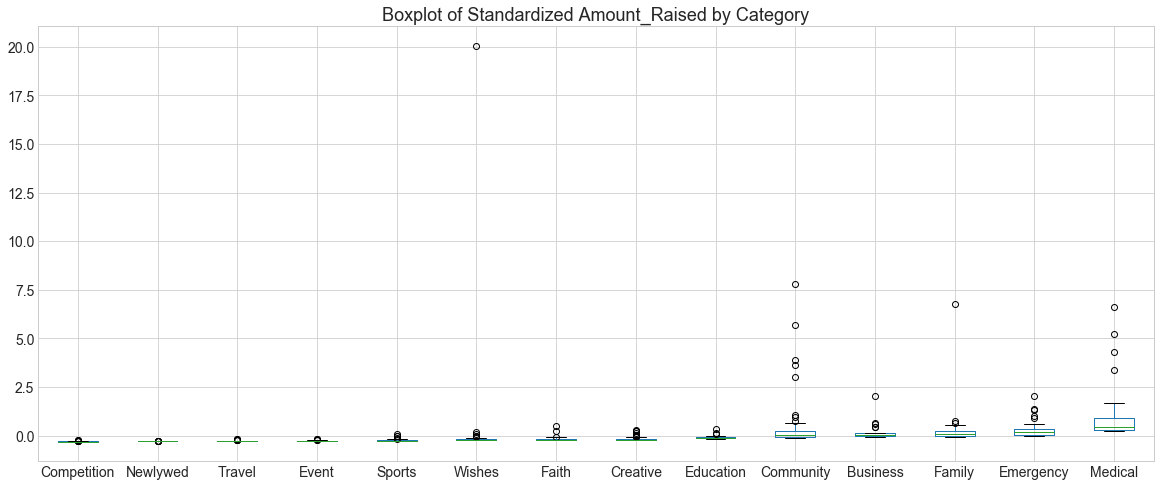

In [22]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.title("Boxplot of Standardized Amount_Raised by Category", fontsize=18)
plt.suptitle("")

Text(0.5, 0.98, '')

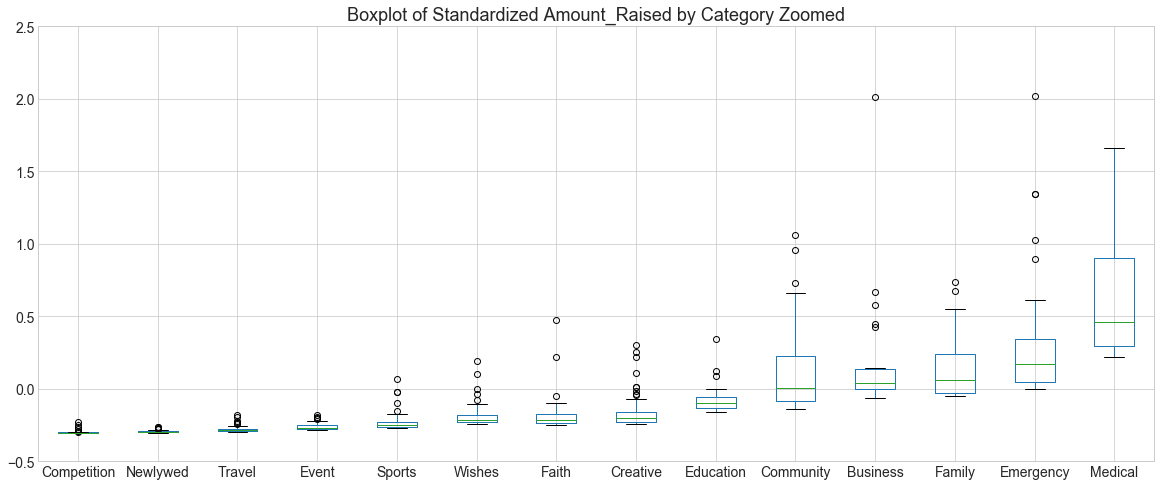

In [23]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.ylim(-0.5, 2.5)
plt.title("Boxplot of Standardized Amount_Raised by Category Zoomed", fontsize=18)
plt.suptitle("")

In [24]:
cat_subset = df[['Category', 'Amount_Raised']]
grps = pd.unique(cat_subset['Category'])
l_data = [cat_subset['Amount_Raised'][cat_subset['Category'] == grp] for grp in grps]
f, p = stats.f_oneway(*l_data)

In [25]:
f, p

(7.986292463206721, 4.360373322618361e-15)

## Ridge Regression

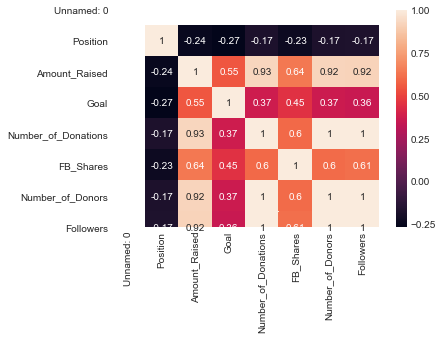

In [142]:
sn.heatmap(df.corr(), annot = True)
plt.show()

In [98]:
def to_integer(x):
    d = {'Business': 1, 'Community': 2, 'Competition': 3, 'Creative': 4, 'Education': 5, 'Emergency': 6, 'Event': 7, 'Faith': 8, 'Family':9, 'Medical': 10, 'Newlywed':11, 'Sports':12, 'Travel':13, 'Wishes': 14}
    return d[x]

In [100]:
new_column = df.get('Category').apply(to_integer)
df = df.assign(Categorical_Assign = new_column)

In [101]:
reg_df = df[['Amount_Raised', 'Categorical_Assign', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [102]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

,Amount_Raised,Categorical_Assign,Goal,Number_of_Donations,FB_Shares,Number_of_Donors,Followers,Category
0,6.616203,0.714286,1.000000,0.340524,1.000000,0.344704,0.351527,Medical
1,5.214384,0.714286,0.301120,0.096752,0.592795,0.096227,0.097436,Medical
2,1.659910,0.714286,0.301120,0.044071,0.152456,0.040685,0.041516,Medical
3,1.411933,0.714286,0.213760,0.109683,0.019047,0.109869,0.111661,Medical
4,1.194743,0.714286,0.161344,0.028745,0.028638,0.028992,0.030234,Medical
...,...,...,...,...,...,...,...,...
775,-0.233882,1.000000,-0.037836,-0.006599,-0.016704,-0.006487,-0.006462,Wishes
776,-0.234522,1.000000,-0.039583,-0.007293,-0.006240,-0.007198,-0.007174,Wishes
777,-0.236321,1.000000,-0.013375,-0.003342,0.005095,-0.003164,-0.003122,Wishes
778,-0.238552,1.000000,-0.047970,-0.006925,-0.014088,-0.006833,-0.006806,Wishes


In [103]:
X = df[predictors].values
y = df[target_column].values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(524, 6)
(225, 6)


In [155]:
rr = Ridge(alpha=0)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

0.20837018937031504
0.9012027760432971


In [156]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.5026899150740385
0.8904146088941645


In [158]:
rr.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [159]:
X

array([[ 7.4701156 , 11.81363888,  7.16250671,  7.2761067 ,  8.945946  ,
        10.        ],
       [ 2.07055295,  7.00307066,  2.03506943,  2.03118553,  2.69380676,
        10.        ],
       [ 0.88223222,  1.80106435,  0.92697886,  0.85879138,  2.69380676,
        10.        ],
       ...,
       [-0.0663396 ,  0.06019491, -0.07030265, -0.06678294, -0.1196559 ,
        14.        ],
       [-0.14462283, -0.16642715, -0.14565281, -0.14422266, -0.42913679,
        14.        ],
       [-0.07770161, -0.33639369, -0.0803762 , -0.07788984, -0.33848077,
        14.        ]])